In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the data
data = pd.read_csv('Social_Network_Ads.csv')

# Split the data into features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:
# Train the KNN model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
# Predict the test set results
y_pred = classifier.predict(X_test)



In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(cm)

Accuracy: 93.00%
Confusion Matrix:
[[64  4]
 [ 3 29]]


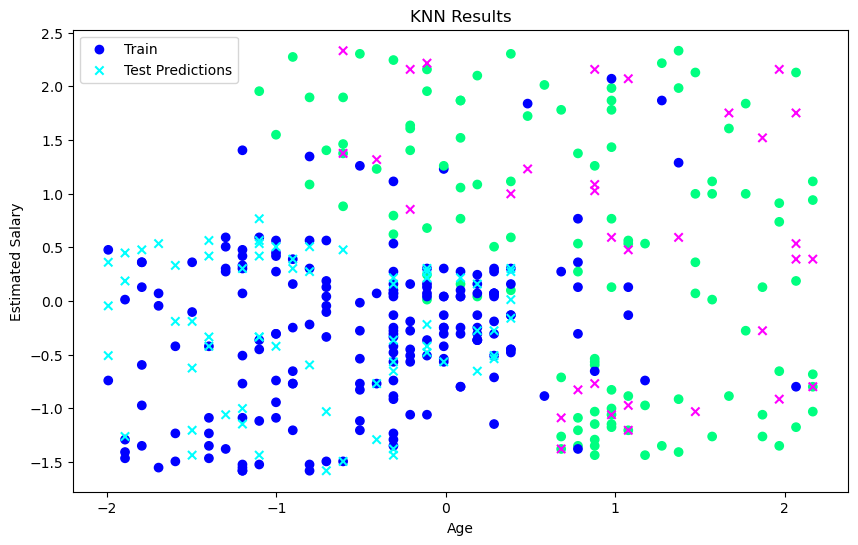

In [6]:
# Plot the test results
plt.figure(figsize=(10, 6))

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='o', label='Train')

# Plot the testing points with predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', marker='x', label='Test Predictions')

plt.title('KNN Results')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [7]:
# Display test data and predictions side by side
results = pd.DataFrame({'Age': X_test[:, 0], 'EstimatedSalary': X_test[:, 1], 'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

          Age  EstimatedSalary  Actual  Predicted
132 -0.804802         0.504964       0          0
309 -0.012544        -0.567782       0          0
341 -0.309641         0.157046       0          0
196 -0.804802         0.273019       0          0
246 -0.309641        -0.567782       0          0
60  -1.101899        -1.437577       0          0
155 -0.705770        -1.582542       0          0
261 -0.210609         2.157573       1          1
141 -1.993189        -0.045906       0          0
214  0.878746        -0.770734       0          1
